In [1]:
import numpy as np

from rocketpy import Environment, Flight, Function, Rocket, MonteCarlo, SolidMotor, utilities
from rocketpy.stochastic import (
    StochasticEnvironment,
    StochasticFlight,
    StochasticParachute,
    StochasticRocket,
    StochasticSolidMotor,
)

In [2]:
parameters = {
    # Mass Details
    "rocket_mass": 4.285,  # propellant mass = 1.37
    "CG": -1.04,

    # Aerodynamic Details
    "inertia_i": 0.968,
    "inertia_z": 0.014,
    "radius": 82.55 / 2000,
    "nozzle_dist_from_tip": -1.559,
    "power_off_drag": "./NoMotor_CD.csv",
    "power_on_drag": "./NoMotor_CD.csv",
    "nose_length": 0.3,
    "nfins": 4,
    "fin_thickness": 5 / 1000,
    "fin_dist_from_tip": -1.25,
    "tail_top_radius": 82.5 / 2000,
    "tail_bottom_radius": 60 / 2000,
    "tail_length": 75 / 1000,
    "tail_dist_from_tip": -1.492,

    # Launch and Environment Details
    "wind_direction": 0,
    "wind_speed": 2,
    "inclination": 89,
    "heading": 45,
    "rail_length": 2.44,

    # Parachute Details
    "Cd_drogue": 0.8,
    "Cd_main": 0.8,
    "drogue_diam": 300 / 1000,
    "main_diam": 900 / 1000,
    "lag_rec": 1, # Lag between chute deployment and inflation,
    "main_deploy_alt": 300
}

In [3]:
# Environment conditions
env = Environment(
    gravity=9.81,
    latitude=39.078542,
    longitude=-75.876347, # Higgs
    date=(2025, 9, 10, 12),
    elevation=17,
)
env.set_atmospheric_model(type="Ensemble", file="GEFS")
# env.set_atmospheric_model(
#     type="Reanalysis",
#     file="../../data/weather/bella_lui_weather_data_ERA5.nc",
#     dictionary="ECMWF",
# )

env.max_expected_height = 5000

oc_open: server error retrieving url: code=0 message="/gens_bc/gens20250909/gep_all_00z is not an available dataset"


Gravity Details

Acceleration of gravity at surface level:    9.8100 m/s²
Acceleration of gravity at   5.000 km (ASL): 9.8100 m/s²


Launch Site Details

Launch Date: 2025-09-10 12:00:00 UTC
Launch Site Latitude: 39.07854°
Launch Site Longitude: -75.87635°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 424198.93 W    4325857.98 N
Launch Site UTM zone: 17S
Launch Site Surface Elevation: 17.0 m


Atmospheric Model Details

Atmospheric Model Type: Ensemble
Ensemble Maximum Height: 5.000 km
Ensemble Time Period: from 2025-09-08 18:00:00 to 2025-09-24 18:00:00 utc
Ensemble Hour Interval: 6 hrs
Ensemble Latitude Range: From -90.0° to 90.0°
Ensemble Longitude Range: From 0.0° to 359.5°
Number of Ensemble Members: 31
Selected Ensemble Member: 0 (Starts from 0)


Surface Atmospheric Conditions

Surface Wind Speed: 9.84 m/s
Surface Wind Direction: 40.13°
Surface Wind Heading: 220.13°
Surface Pressure: 1000.00 hPa
Surface Temperature: 291.08 K
Surface Air Density: 1.197 kg/m³
Surface S

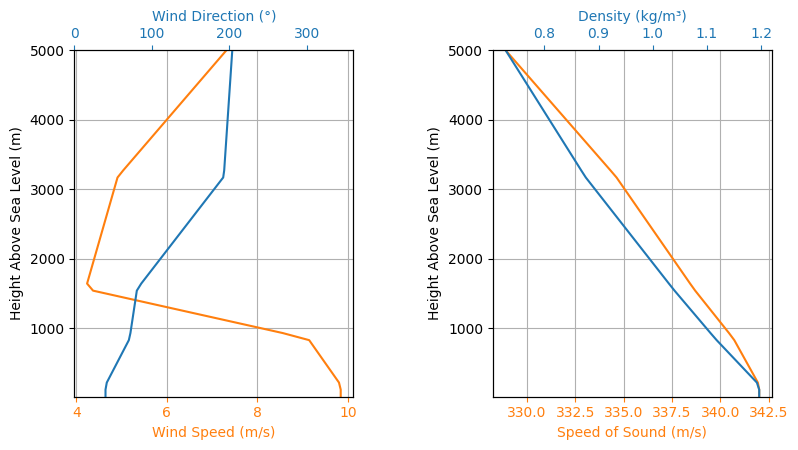

In [4]:
env.info()

In [5]:
J450 = SolidMotor(
    thrust_source="J450.eng",
    dry_mass=0.547,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.15,
    grains_center_of_mass_position=0.15,
    grain_number=3,
    grain_separation=1.5 / 1000,
    grain_density=1697.885355, # DM prop
    grain_outer_radius=47.5 / 2000,
    grain_initial_inner_radius=15.875 / 2000,
    grain_initial_height=91 / 1000,
    nozzle_radius=9.525 / 1000,
    throat_radius=9.525 / 2000,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

L1000 = SolidMotor(
    thrust_source="L1000.eng",
    dry_mass=0.794,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.3,
    grains_center_of_mass_position=0.3,
    grain_number=5,
    grain_separation=1.5 / 1000,
    grain_density=1820.230534, # White Lightning Prop
    grain_outer_radius=47.5 / 2000,
    grain_initial_inner_radius=17.475 / 2000,
    grain_initial_height=107.95 / 1000,
    nozzle_radius=15.875 / 1000,
    throat_radius=15.875 / 2000,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

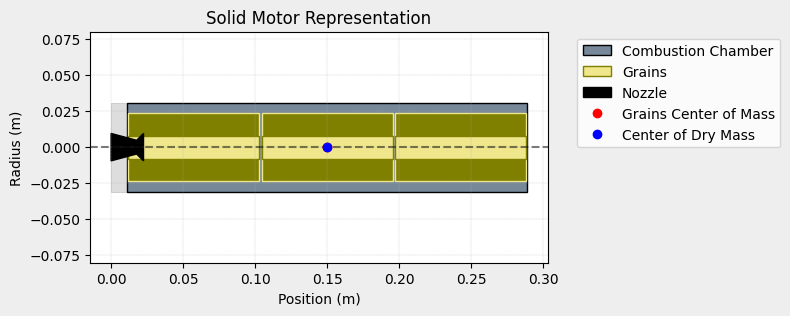

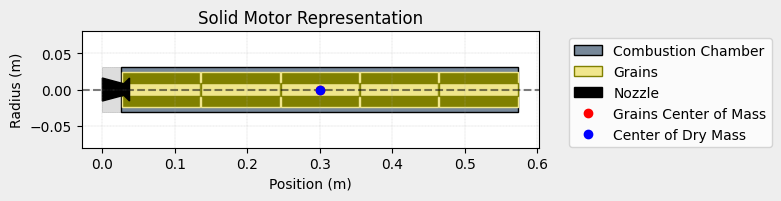

In [6]:
J450.plots.draw()
L1000.plots.draw()

Nozzle Details
Nozzle Radius: 0.009525 m
Nozzle Throat Radius: 0.0047625 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.0015 m
Grain Density: 1697.885355 kg/m3
Grain Outer Radius: 0.02375 m
Grain Inner Radius: 0.0079375 m
Grain Height: 0.091 m
Grain Volume: 0.000 m3
Grain Mass: 0.243 kg

Motor Details
Total Burning Time: 2.311 s
Total Propellant Mass: 0.730 kg
Structural Mass Ratio: 0.428
Average Propellant Exhaust Velocity: 1454.957 m/s
Average Thrust: 459.367 N
Maximum Thrust: 541.417 N at 0.802 s after ignition.
Total Impulse: 1061.597 Ns



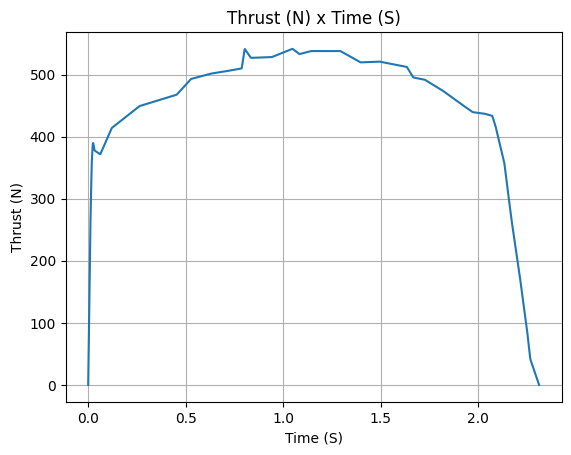

Nozzle Details
Nozzle Radius: 0.015875 m
Nozzle Throat Radius: 0.0079375 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.0015 m
Grain Density: 1820.230534 kg/m3
Grain Outer Radius: 0.02375 m
Grain Inner Radius: 0.0087375 m
Grain Height: 0.10795 m
Grain Volume: 0.000 m3
Grain Mass: 0.301 kg

Motor Details
Total Burning Time: 3.0 s
Total Propellant Mass: 1.505 kg
Structural Mass Ratio: 0.345
Average Propellant Exhaust Velocity: 1794.985 m/s
Average Thrust: 900.695 N
Maximum Thrust: 1322.279 N at 0.04 s after ignition.
Total Impulse: 2702.086 Ns



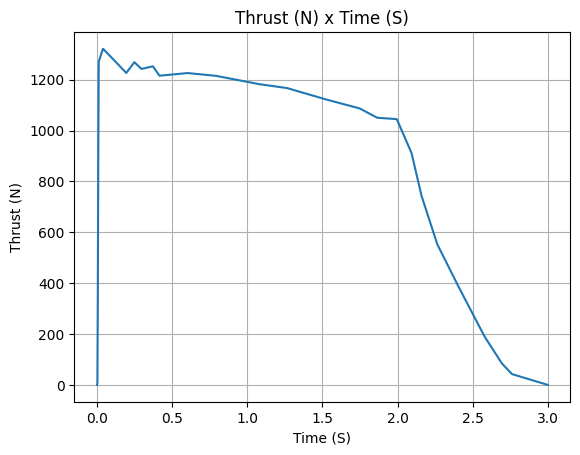

In [7]:
J450.info()
L1000.info()

In [8]:
apex = Rocket(
    radius=parameters.get("radius"),
    mass=parameters.get("rocket_mass"),
    inertia=(
        parameters.get("inertia_i"),
        parameters.get("inertia_i"),
        parameters.get("inertia_z"),
    ),
    power_off_drag=parameters.get("power_off_drag"),
    power_on_drag=parameters.get("power_on_drag"),
    center_of_mass_without_motor=parameters.get("CG"),
)
# apex.add_motor(motor=L1000, position=parameters.get("nozzle_dist_from_tip"))
apex.add_motor(motor=J450, position=parameters.get("nozzle_dist_from_tip"))

In [9]:
nose_cone = apex.add_nose(
    length=parameters.get("nose_length"),
    kind="ogive",
    position=0,
)

fin_set = apex.add_trapezoidal_fins(
    parameters.get("nfins"),
    span = 9 / 100,
    sweep_length = 25 / 100,
    root_chord = 30 / 100,
    tip_chord = 5 / 100,
    position=parameters.get("fin_dist_from_tip"),
)

tail = apex.add_tail(
    top_radius=parameters.get("tail_top_radius"),
    bottom_radius=parameters.get("tail_bottom_radius"),
    length=parameters.get("tail_length"),
    position=parameters.get("tail_dist_from_tip"),
)

In [10]:
drogue = apex.add_parachute(
    "Drogue",
    cd_s=parameters.get("Cd_drogue") * np.pi * ((parameters.get("drogue_diam")/2) ** 2),
    trigger="apogee",
    lag=parameters.get("lag_rec"),
)

main = apex.add_parachute(
    "Main",
    cd_s=parameters.get("Cd_main") * np.pi * ((parameters.get("main_diam")/2) ** 2),
    trigger=parameters.get("main_deploy_alt"),
    lag=parameters.get("lag_rec"),
)

In [11]:
apex.info()


Inertia Details

Rocket Mass: 4.285 kg (without motor)
Rocket Dry Mass: 4.832 kg (with unloaded motor)
Rocket Loaded Mass: 5.562 kg
Rocket Structural Mass Ratio: 0.869
Rocket Inertia (with unloaded motor) 11: 1.034 kg*m2
Rocket Inertia (with unloaded motor) 22: 1.034 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.014 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.041275 m
Rocket Frontal Area: 0.005352 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.042 m
Rocket Center of Dry Mass - Nozzle Exit: 0.477 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.327 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.043 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 10.719/rad
Tail Lift Coefficient De

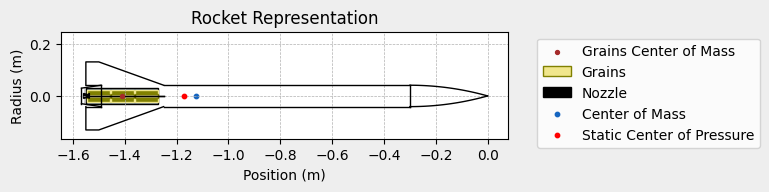

In [12]:
apex.draw()

In [13]:
# Flight
test_flight = Flight(
    rocket=apex,
    environment=env,
    rail_length=parameters.get("rail_length"),
    inclination=parameters.get("inclination"),
    heading=parameters.get("heading"),
)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 17.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.924 | e1: -0.008 | e2: 0.003 | e3: -0.383
Euler Angles - Spin φ : 0.00° | Nutation θ: -1.00° | Precession ψ: -45.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 0.579 c


Surface Wind Conditions

Frontal Surface Wind Speed: -9.81 m/s
Lateral Surface Wind Speed: -0.84 m/s


Launch Rail

Launch Rail Length: 2.44 m
Launch Rail Inclination: 89.00°
Launch Rail Heading: 45.00°


Rail Departure State

Rail Departure Time: 0.290 s
Rail Departure Velocity: 18.256 m/s
Rail Departure Stability Margin: 0.630 c
Rail Departure Angle of Attack: 28.102°
Rail Departure Thrust-Weight Ratio: 8.403
Rail Departure Reynolds Number: 1.144e+05


Burn out State

Burn out time: 2.311 s
Altitude at burn out: 222.021 m (ASL) | 205.021 m (AGL)
Rocket speed at burn out: 171.966 m/s
Freestream ve

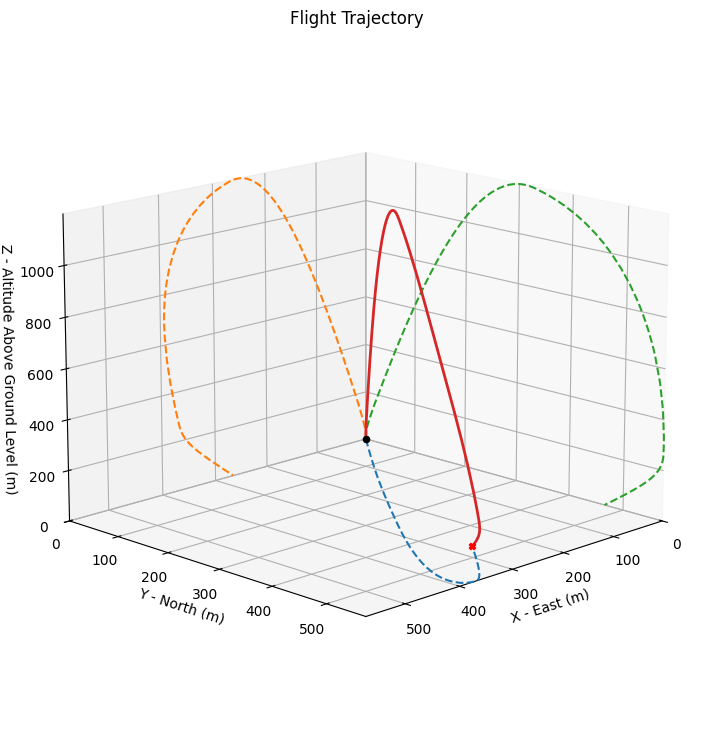

In [14]:
test_flight.info()
test_flight.plots.trajectory_3d()

In [15]:
# utilities.fin_flutter_analysis(parameters.get("fin_thickness"), 19000, test_flight, see_prints=True, see_graphs=True)

In [16]:
stochastic_env = StochasticEnvironment(
    environment=env,
    ensemble_member=list(range(env.num_ensemble_members)),
)

stochastic_env.visualize_attributes()

Reporting the attributes of the `StochasticEnvironment` object:

Constant Attributes:
	datum                    SIRGAS2000
	elevation                17
	gravity                  Function from R1 to R1 : (height (m)) → (gravity (m/s²))
	latitude                 39.078542
	longitude                -75.876347
	timezone                 UTC

Stochastic Attributes:
	wind_velocity_x_factor   1.00000 ± 0.00000 (normal)
	wind_velocity_y_factor   1.00000 ± 0.00000 (normal)

Stochastic Attributes with choice of values:
	ensemble_member [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [17]:
stochastic_J450 = StochasticSolidMotor(
    solid_motor=J450,
    grains_center_of_mass_position=0.001,
    grain_density=50,
    grain_separation=1 / 1000,
    grain_initial_height=1 / 1000,
    grain_initial_inner_radius=0.375 / 1000,
    grain_outer_radius=0.375 / 1000,
    total_impulse=(1097, 100),
    throat_radius=0.5 / 1000,
    nozzle_radius=0.5 / 1000,
    nozzle_position=0.001,
)

stochastic_L1000 = StochasticSolidMotor(
    solid_motor=L1000,
    grains_center_of_mass_position=0.001,
    grain_density=100,
    grain_separation=1 / 1000,
    grain_initial_height=1 / 1000,
    grain_initial_inner_radius=0.375 / 1000,
    grain_outer_radius=0.375 / 1000,
    total_impulse=(2714, 500),
    throat_radius=0.5 / 1000,
    nozzle_radius=0.5 / 1000,
    nozzle_position=0.001,
)

stochastic_J450.visualize_attributes()
stochastic_L1000.visualize_attributes()

Reporting the attributes of the `StochasticSolidMotor` object:

Constant Attributes:
	burn_out_time                    2.311
	burn_start_time                  0.0
	center_of_dry_mass_position      0.15
	coordinate_system_orientation    nozzle_to_combustion_chamber
	dry_I_11                         0
	dry_I_12                         0
	dry_I_13                         0
	dry_I_22                         0
	dry_I_23                         0
	dry_I_33                         0
	dry_mass                         0.547
	grain_number                     3
	interpolate                      linear
	thrust_source                    [[0, 0], [0.012, 270.708], [0.018, 356.898], [0.024, 392.102], [0.033, 377.535], [0.062, 371.465], [0.121, 413.953], [0.263, 449.157], [0.453, 467.367], [0.527, 492.859], [0.627, 501.357], [0.701, 504.999], [0.787, 509.854], [0.802, 541.417], [0.834, 526.85], [0.941, 528.064], [1.047, 541.417], [1.083, 532.919], [1.142, 537.775], [1.293, 537.775], [1.396, 519.566], 

In [18]:
stochastic_rocket = StochasticRocket(
    rocket=apex,
    mass=0.5,
    inertia_11=0.1,
    inertia_22=0.1,
    inertia_33=0.01,
    center_of_mass_without_motor=0,
)

stochastic_main = StochasticParachute(
    parachute=main,
    cd_s=0.1,
    lag=0.1,
)

stochastic_drogue = StochasticParachute(
    parachute=drogue,
    cd_s=0.05,
    lag=0.2,
)

# stochastic_rocket.add_motor(stochastic_L1000, position=0.001)
stochastic_rocket.add_motor(stochastic_J450, position=0.001)
stochastic_rocket.add_parachute(stochastic_main)
stochastic_rocket.add_parachute(stochastic_drogue)

stochastic_rocket.visualize_attributes()
stochastic_main.visualize_attributes()

Reporting the attributes of the `StochasticRocket` object:

Constant Attributes:
	I_12_without_motor              0
	I_13_without_motor              0
	I_23_without_motor              0
	coordinate_system_orientation   tail_to_nose
	power_off_drag                  Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power Off)
	power_on_drag                   Function from R1 to R1 : (Mach Number) → (Drag Coefficient with Power On)
	radius                          0.041275

Stochastic Attributes:
	I_11_without_motor              0.96800 ± 0.10000 (normal)
	I_22_without_motor              0.96800 ± 0.10000 (normal)
	I_33_without_motor              0.01400 ± 0.01000 (normal)
	center_of_mass_without_motor    -1.04000 ± 0.00000 (normal)
	mass                            4.28500 ± 0.50000 (normal)
	power_off_drag_factor           1.00000 ± 0.00000 (normal)
	power_on_drag_factor            1.00000 ± 0.00000 (normal)
Reporting the attributes of the `StochasticParachute` object:

Con

In [19]:
stochastic_flight = StochasticFlight(
    flight=test_flight,
    inclination=1,
    heading=2,
)
stochastic_flight.visualize_attributes()

Reporting the attributes of the `StochasticFlight` object:

Constant Attributes:
	rail_length           2.44

Stochastic Attributes:
	heading               45.00000 ± 2.00000 (normal)
	inclination           89.00000 ± 1.00000 (normal)


The following input file was imported: Apex_monte_carlo.inputs.txt


/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/rocketpy/simulation/monte_carlo.py:137: UserWarning: This class is still under testing and some attributes may be changed in next versions
  warnings.warn(


A total of 500 simulations results were loaded from the following output file: Apex_monte_carlo.outputs.txt

The following error file was imported: Apex_monte_carlo.errors.txt                                          
Starting Monte Carlo analysis                                     
Running Monte Carlo simulation with 64 workers.
Current iteration: 000498 | Average Time per Iteration: 0.005 s | Estimated time left: 0 s
Completed 500 iterations. In total, 500 simulations are exported.
Total wall time: 2.4 s  
Results saved to Apex_monte_carlo.outputs.txt  


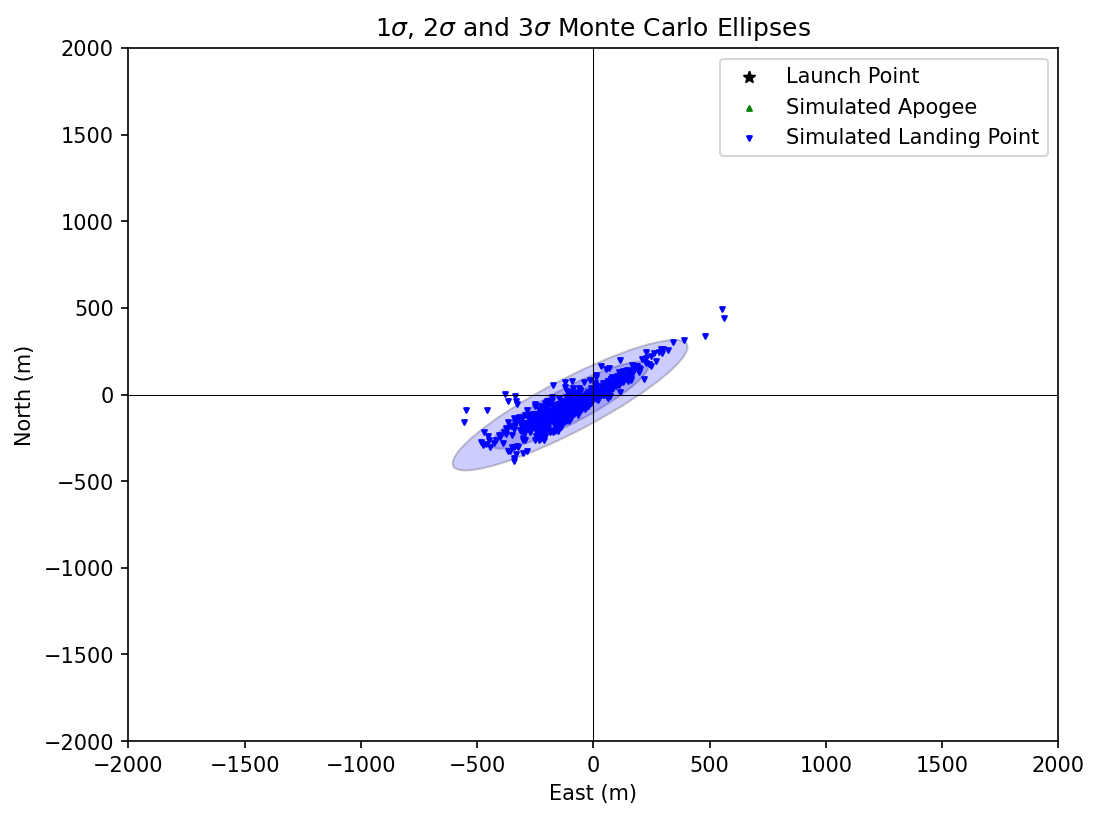

In [20]:
test_dispersion = MonteCarlo(
    filename="Apex_monte_carlo",
    environment=stochastic_env,
    rocket=stochastic_rocket,
    flight=stochastic_flight,
)

test_dispersion.simulate(
    number_of_simulations=500,
    parallel=True,
    n_workers=64,
)

test_dispersion.plots.ellipses(xlim=(-2000, 2000), ylim=(-2000, 2000))

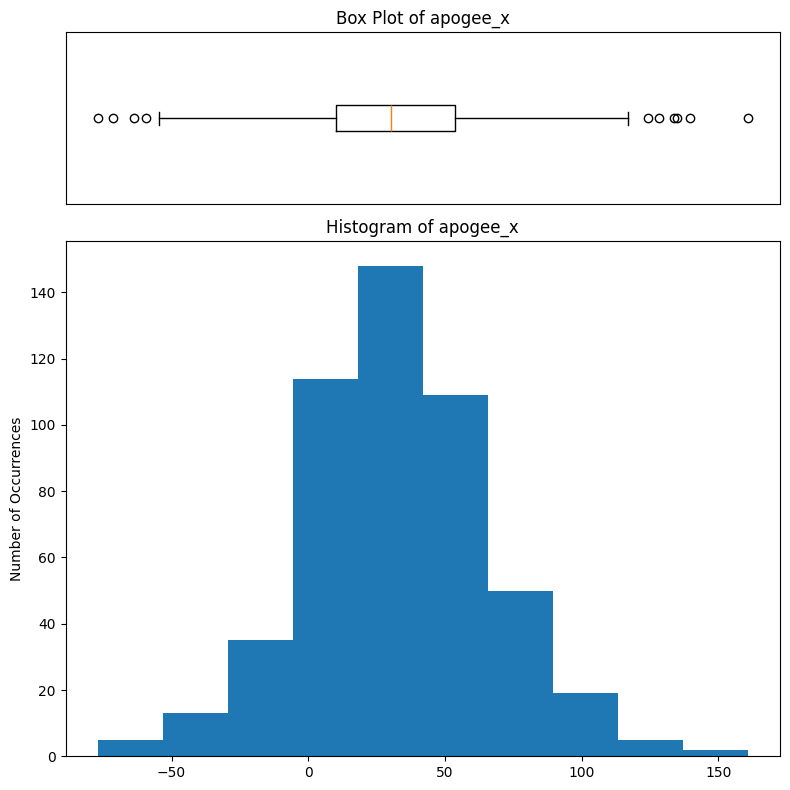

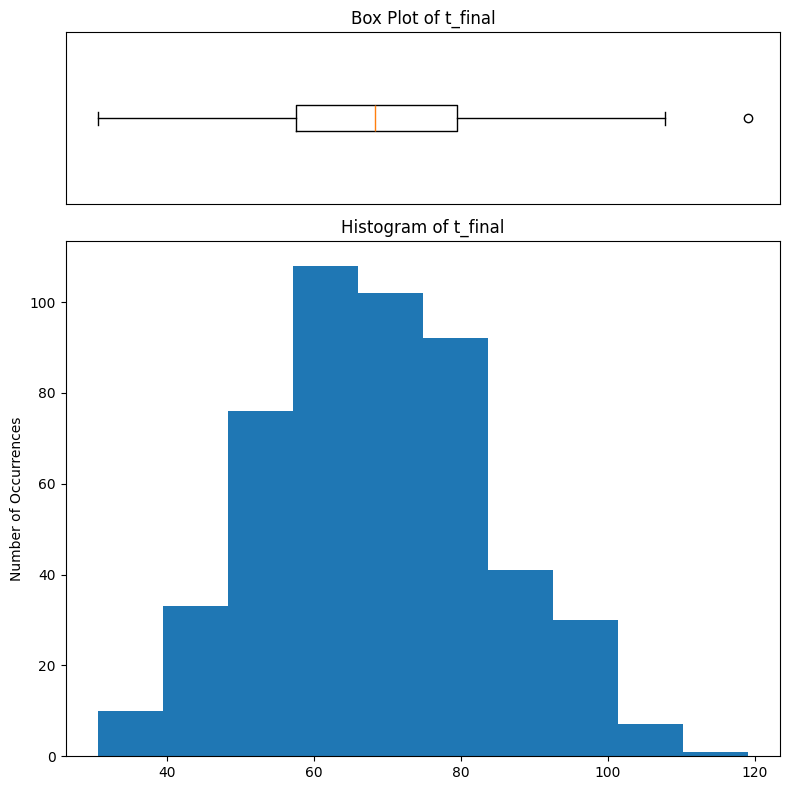

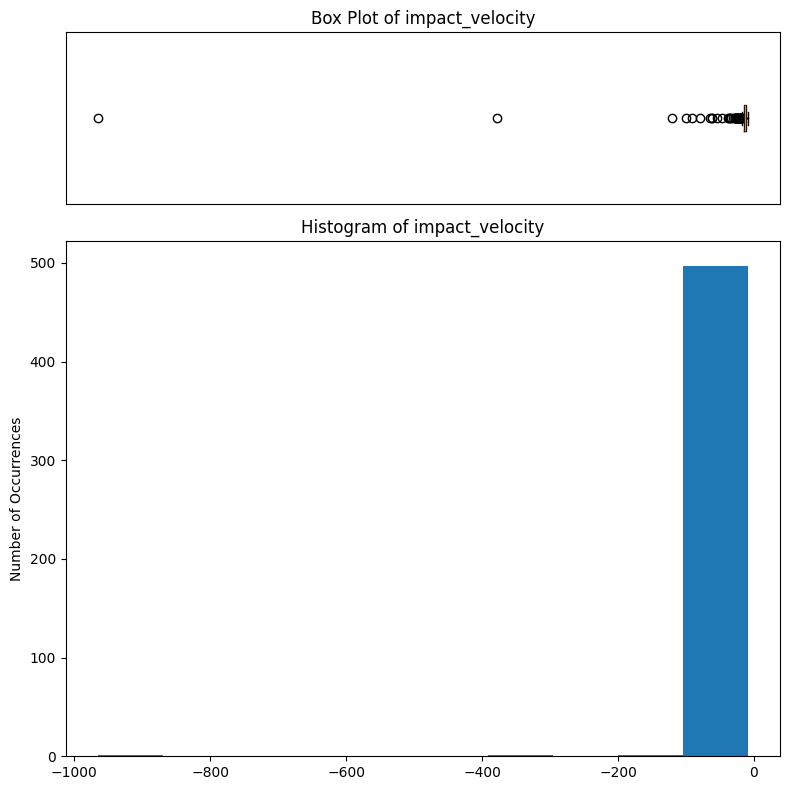

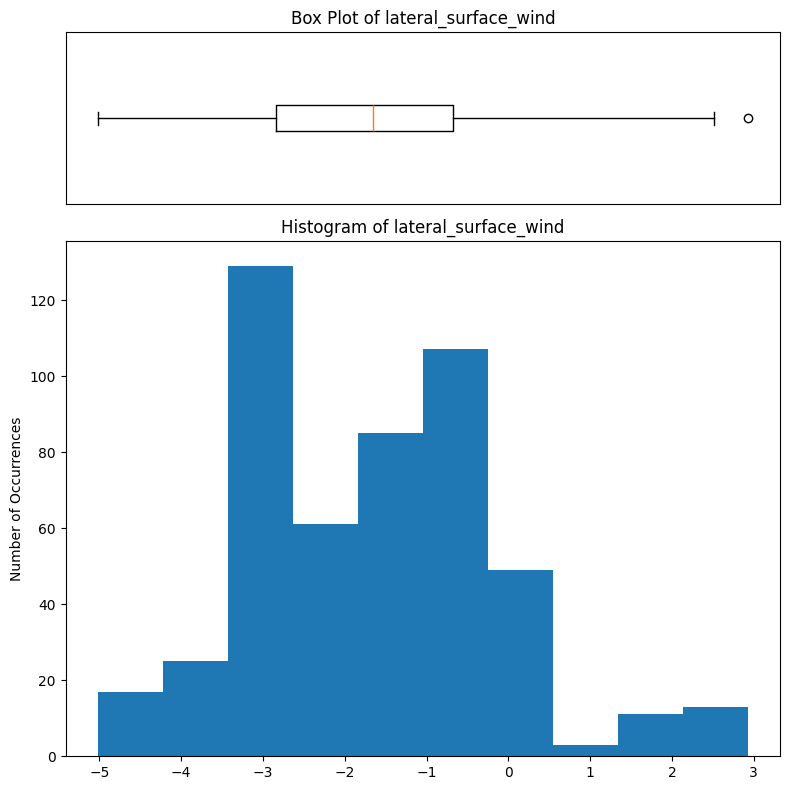

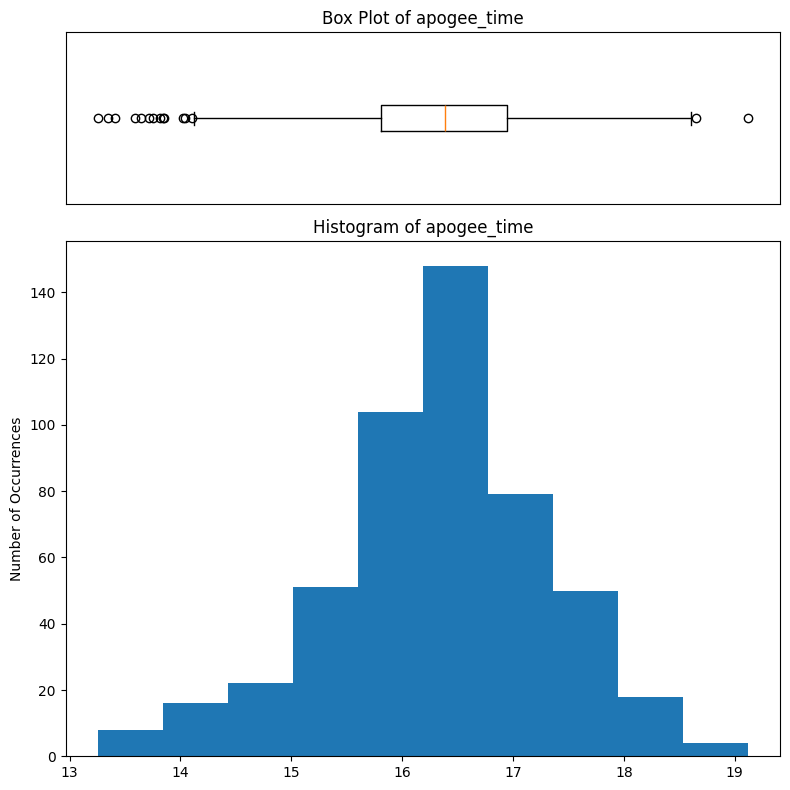

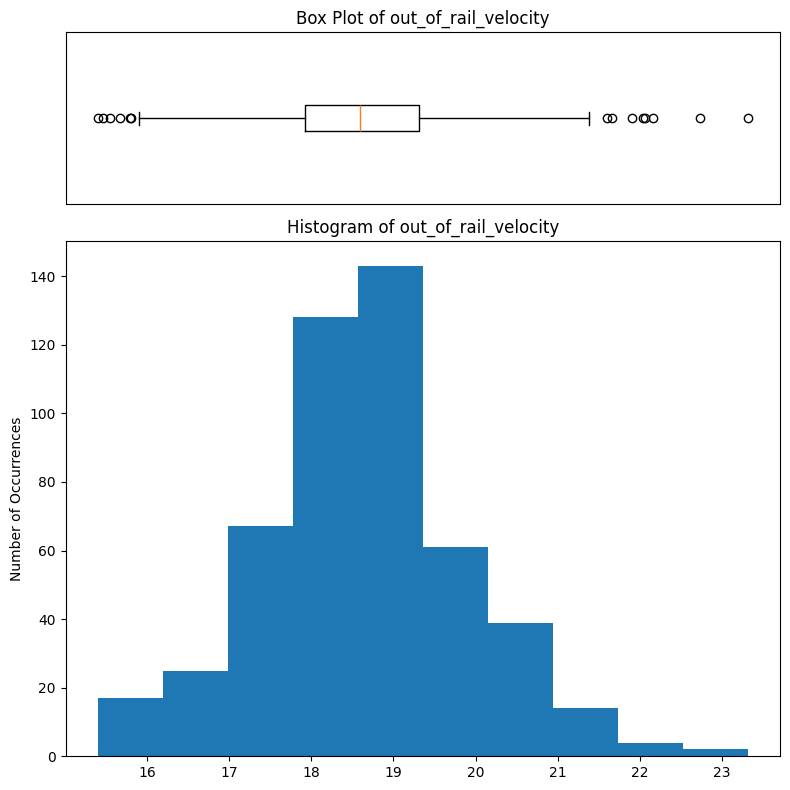

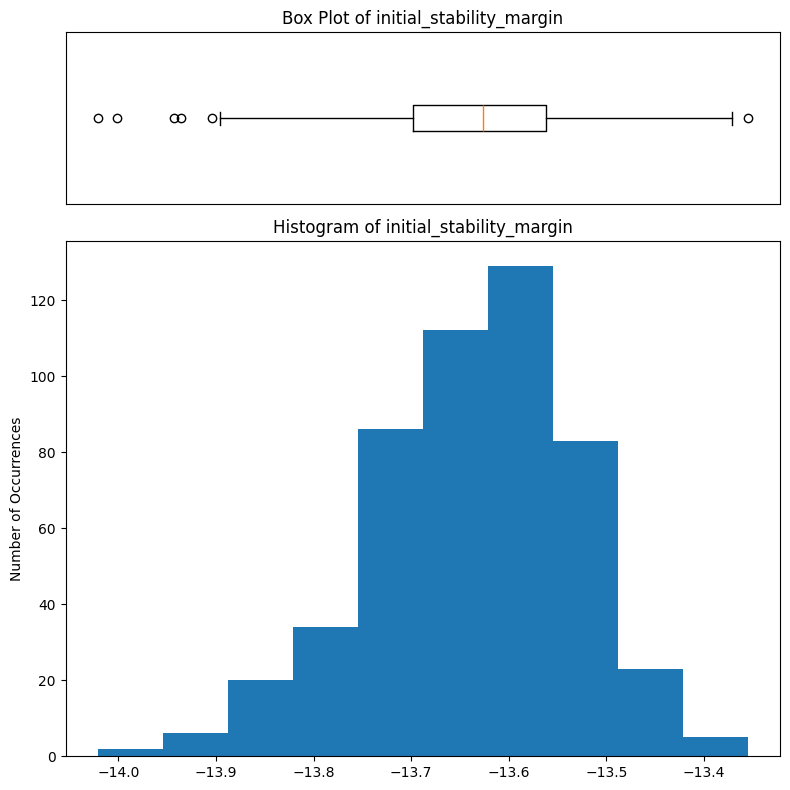

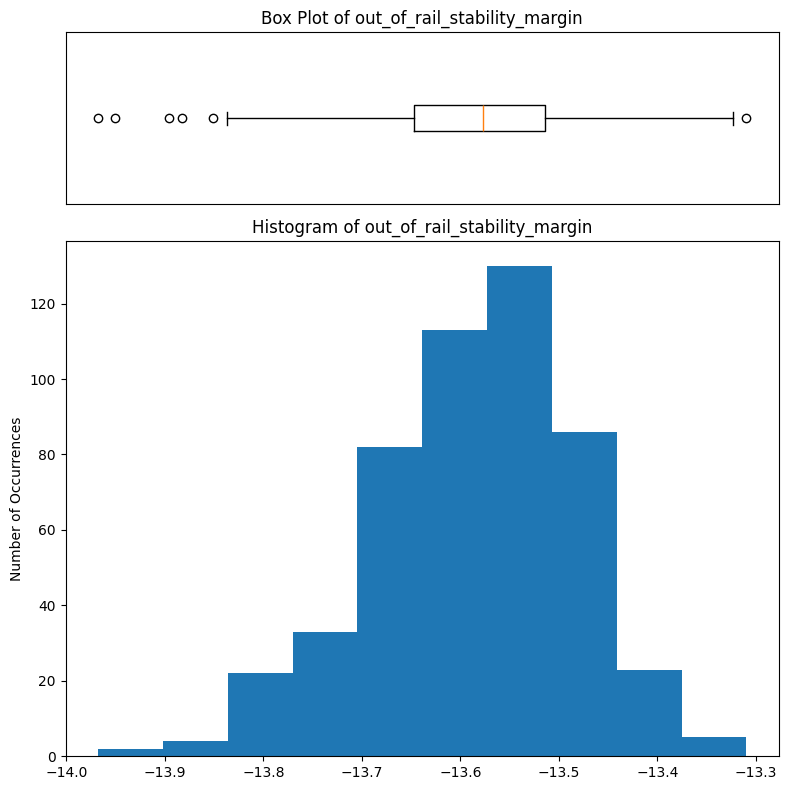

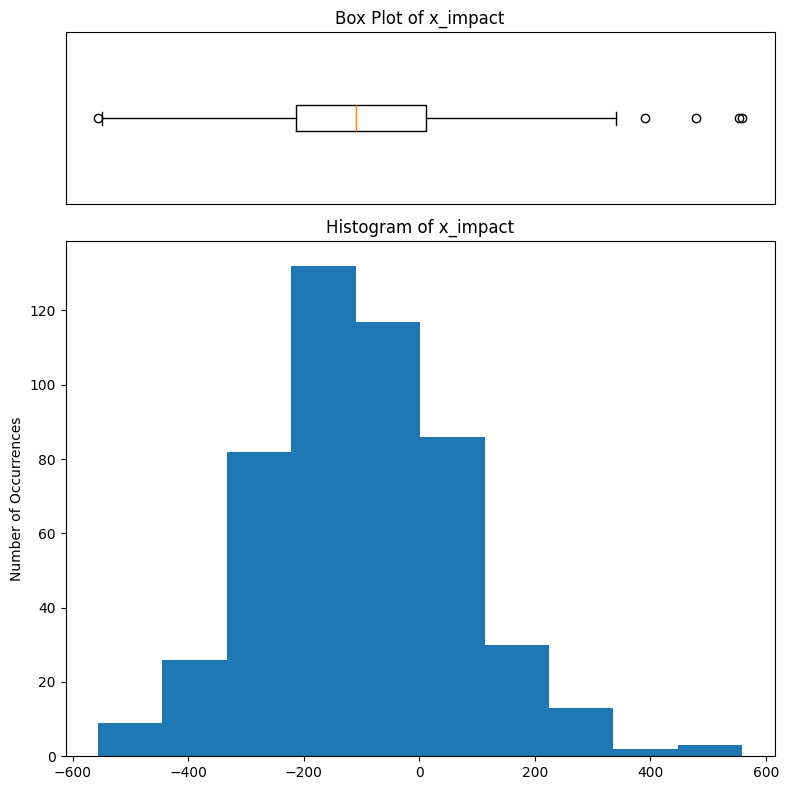

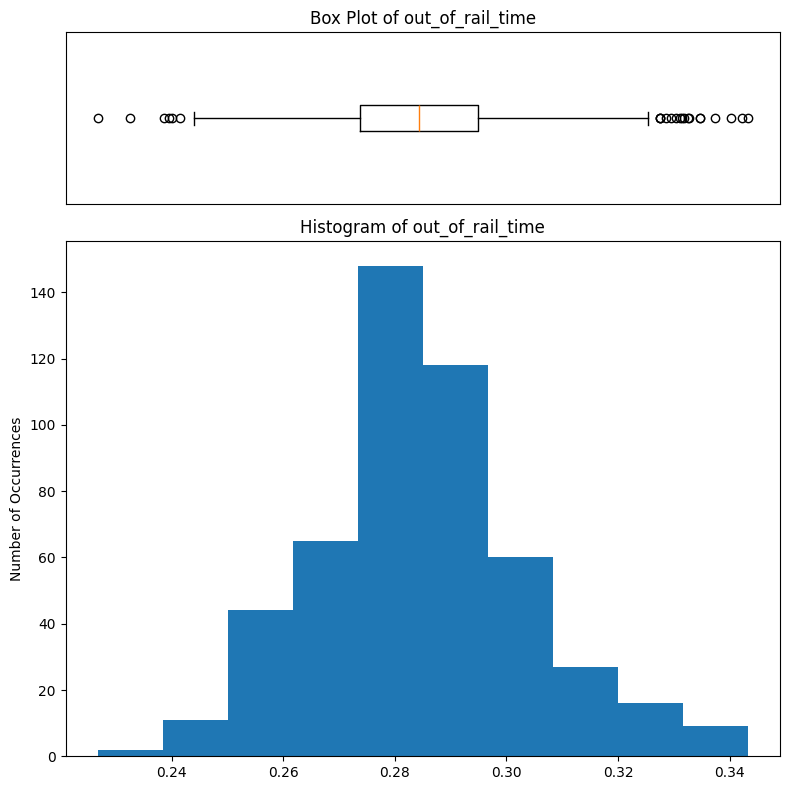

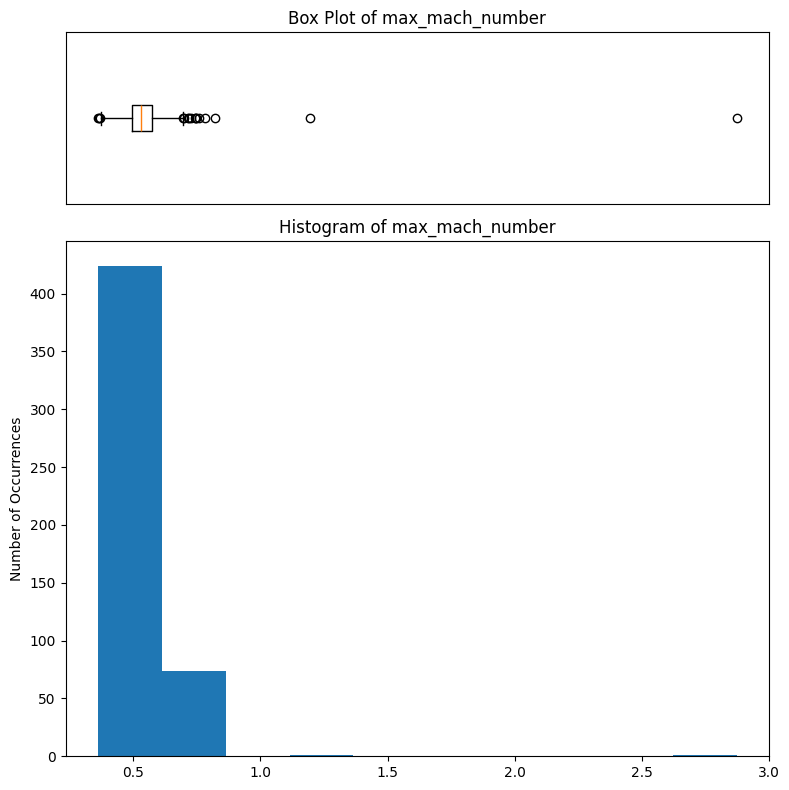

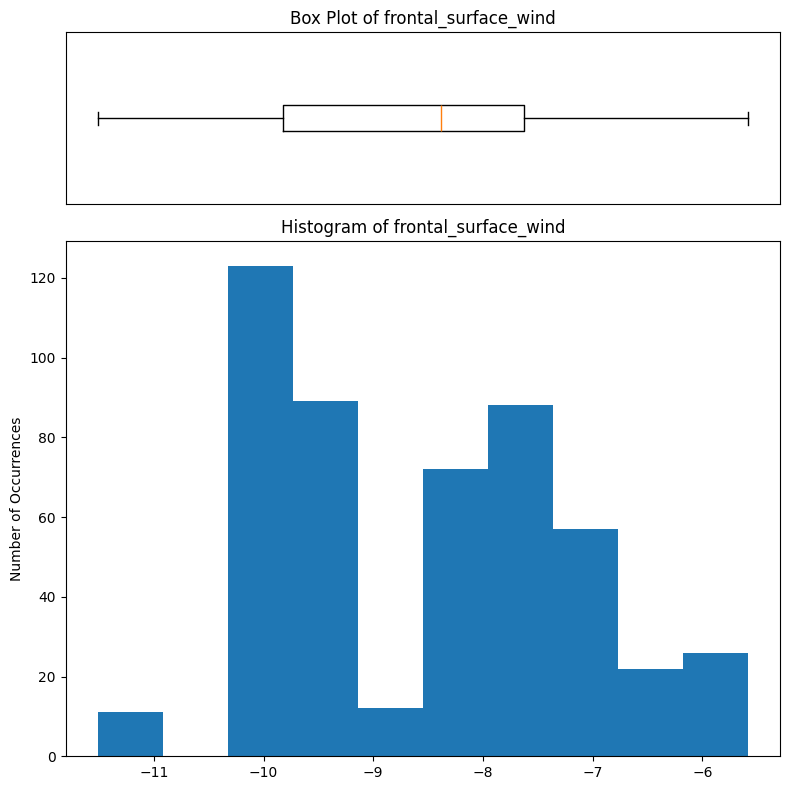

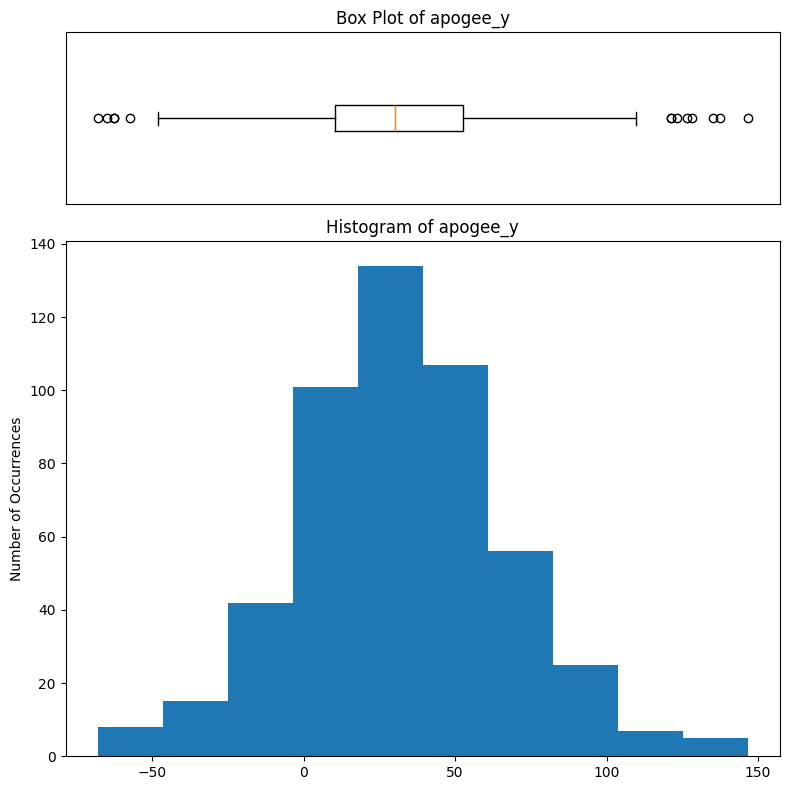

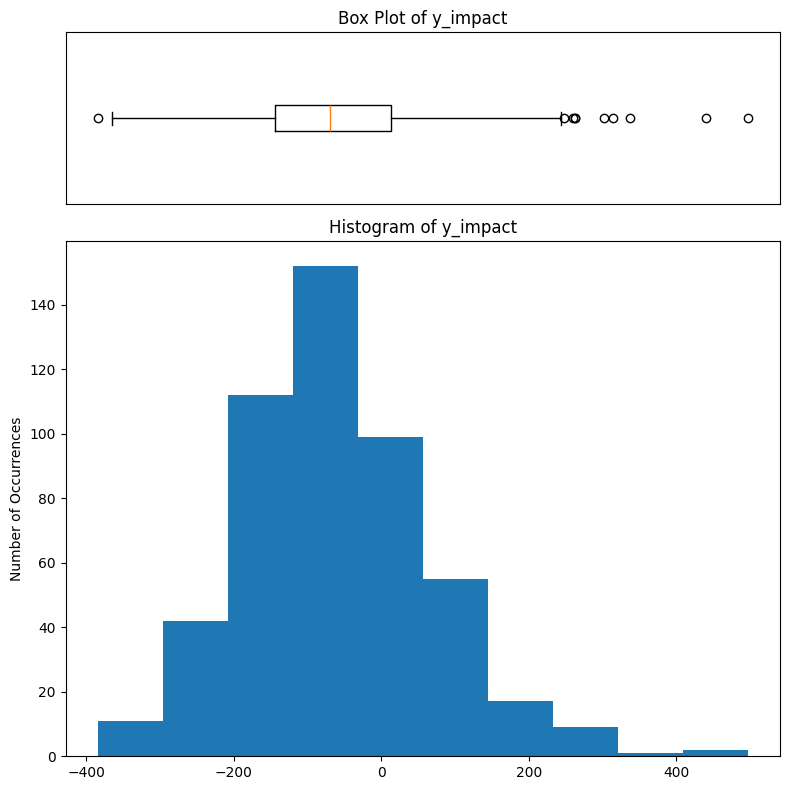

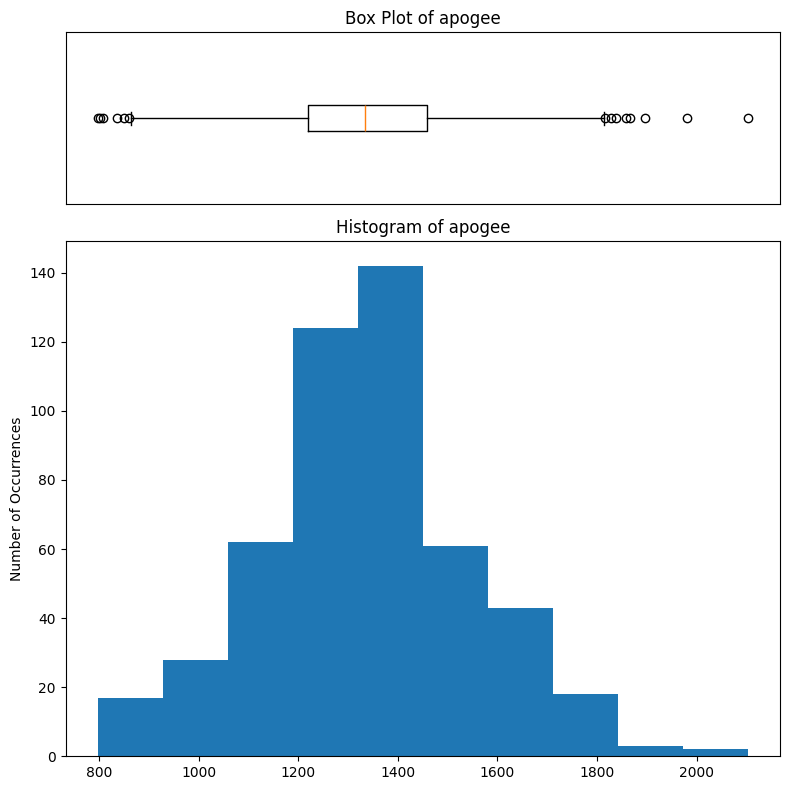

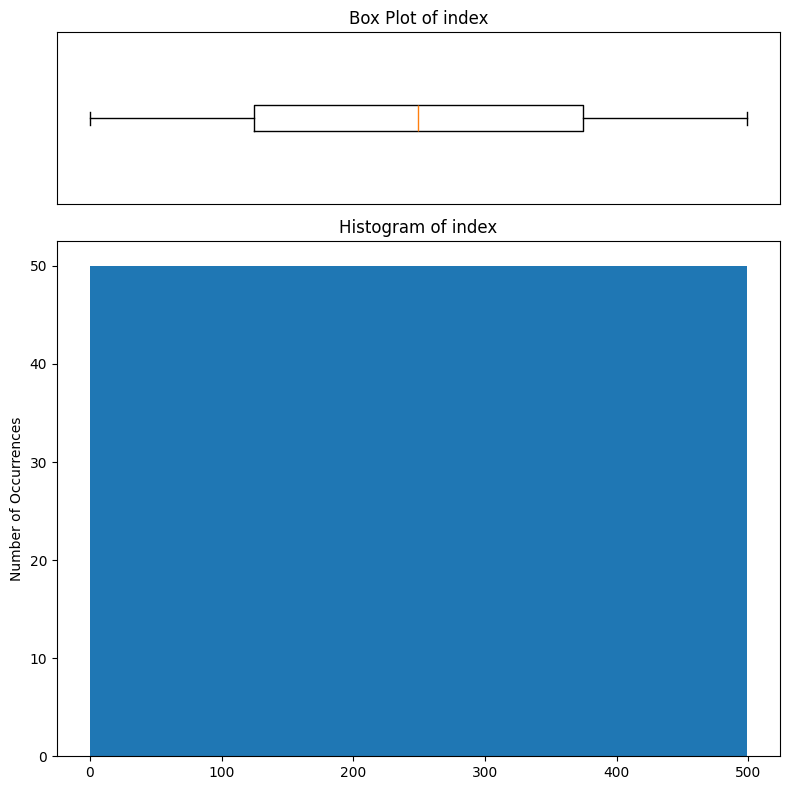

In [21]:
test_dispersion.plots.all()

In [22]:
test_dispersion.export_ellipses_to_kml(
    filename="Apex_monte_carlo.kml",
    origin_lat=env.latitude,
    origin_lon=env.longitude,
    type="impact",
)

/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:571: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/rocketpy/tools.py:397: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance_matrix = np.cov(list_x, list_y)
/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/space/micromamba/envs/rocketry/lib/python3.13/site-packages/numpy/_core/fromnumeric